In [3]:
import numpy as np
import cv2
import mahotas
from matplotlib import pyplot as plt

In [4]:
#Função para facilitar a escrita nas imagem
def escreve(img, texto, cor=(255,0,0)):
  fonte = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(img, texto, (10,20), fonte, 0.5, cor, 0,
  cv2.LINE_AA)

In [21]:
imgColorida = cv2.imread('./dado/dados.png') #Carregamento da imagem

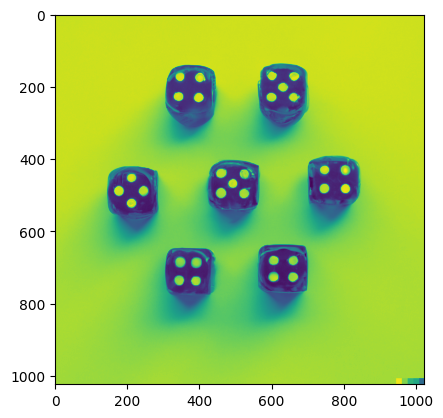

In [20]:
#Passo 1: Conversão para tons de cinza
img = cv2.cvtColor(imgColorida, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

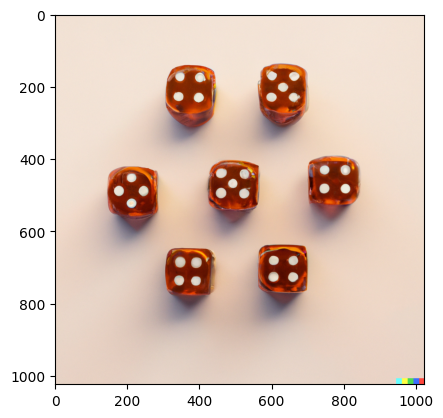

In [7]:
#Passo 2: Blur/Suavização da imagem
suave = cv2.blur(img, (7, 7))

In [8]:
#Passo 3: Binarização resultando em pixels brancos e pretos
T = mahotas.thresholding.otsu(suave)
bin = suave.copy()
bin[bin > T] = 255
bin[bin < 255] = 0
bin = cv2.bitwise_not(bin)

In [9]:
#Passo 4: Detecção de bordas com Canny
bordas = cv2.Canny(bin, 70, 150)

In [10]:
#Passo 5: Identificação e contagem dos contornos da imagem
#cv2.RETR_EXTERNAL = conta apenas os contornos externos
(lx, objetos) = cv2.findContours(bordas.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#A variável lx (lixo) recebe dados que não são utilizados
escreve(img, "Imagem em tons de cinza", 0)
escreve(suave, "Suavizacao com Blur", 0)
escreve(bin, "Binarizacao com Metodo Otsu", 255)
escreve(bordas, "Detector de bordas Canny", 255)
temp = np.vstack([
np.hstack([img, suave]),
np.hstack([bin, bordas])
])

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/drawing.cpp:2508: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


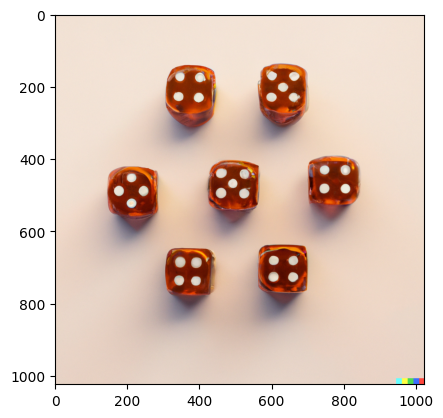

In [14]:
# cv2.imshow("Quantidade de objetos: "+str(len(objetos)), temp)
# cv2_imshow(temp)

# imgC2 = imgColorida.copy()
# cv2_imshow(imgColorida)


# cv2.drawContours(imgC2, objetos, -1, (255, 0, 0), 2)
# escreve(imgC2, str(len(objetos))+" objetos encontrados!")
# cv2_imshow(imgC2)

plt.imshow(temp)
imgC2 = imgColorida.copy()
plt.imshow(imgColorida)

cv2.drawContours(imgC2, objetos, -1, (255, 0, 0), 2)
escreve(imgC2, str(len(objetos))+" objetos encontrados!")
plt.imshow(imgC2)
